In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
import squarify
from pylab import *

%matplotlib inline

In [163]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#D1A72A', '#2D2D2D', '#DDDDC9', '#EB5852', '#CCC614', '#993D3D']),
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 30,
    'axes.grid': True,
    'grid.color': '#2D2D2D',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 4.0,
    'legend.frameon' : False,
    'axes.labelcolor': '#D1A72A',
    'axes.labelsize': 15,
    'font.size': 15,
    'grid.linestyle': '--',
    'text.color': '#DDDDC9',
    'axes.labelcolor': '#DDDDC9',
    'axes.edgecolor': 'silver',
    'xtick.color': '#DDDDC9',
    'ytick.color': '#DDDDC9'
})

In [3]:
df = pd.read_csv('tabs-with-hits.csv')
df.head()

,artist_name,artist_url,date,datetime,difficulty,duration,hits,id,part,preset_id,...,tab_url,tonality_name,tp_version,tracks,tuning,type,type_name,version,version_description,votes
0,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1476429796,2016-10-14,0,0,24610,1890096,album,0.0,...,https://tabs.ultimate-guitar.com/tab/the_beatl...,0,0.0,0,Standard,Chords,Chords,1.0,Some improvements on other submitted versions.,9
1,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1158105601,2006-09-12,0,0,268964,412781,album,0.0,...,https://tabs.ultimate-guitar.com/tab/the_beatl...,0,0.0,0,Standard,Tabs,Tab,1.0,0,20
2,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1476436304,2016-10-14,0,0,35443,1890043,album,3233.0,...,https://tabs.ultimate-guitar.com/tab/the_beatl...,0,0.0,0,Standard,Chords,Chords,1.0,Some improvements on other submitted versions.,10
3,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1088553600,2004-06-29,0,0,262652,124485,album,3233.0,...,https://tabs.ultimate-guitar.com/tab/the_beatl...,0,0.0,0,Standard,Tabs,Tab,1.0,0,17
4,The Beatles,https://www.ultimate-guitar.com/artist/the_bea...,1225670401,2008-11-02,0,0,89186,750913,album,3233.0,...,https://tabs.ultimate-guitar.com/tab/the_beatl...,0,0.0,0,Standard,Tabs,Tab,2.0,0,7


In [4]:
df.datetime = pd.to_datetime(df.datetime)

In [5]:
df_sans_2018 = df[df.datetime.dt.year != 2018]

In [6]:
df_top = pd.read_csv('top_100_rated_tabs_all_time.csv')

In [7]:
df_top.datetime = pd.to_datetime(df_top.datetime)

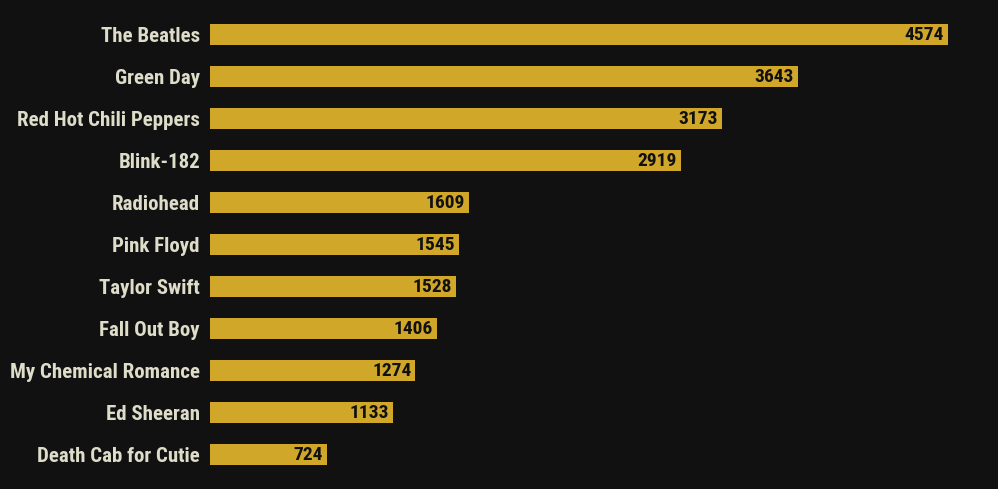

In [12]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df.artist_name.value_counts().sort_values().plot(kind='barh', color=['#D1A72A'], figsize=(10,6))

#barlabels = ['The Beatles', 'Green Day', 'Red Hot Chili Peppers', 'Blink-182', 'Radiohead', 'Pink Floyd', 'Taylor Swift', 'Fall Out Boy', 'My Chemical Romance', 'Ed Sheeran',  'Death Cab for Cutie']
#barlabels = barlabels[::-1]
ax.grid(False)
ax.set_ylabel('')
#ax.set_title('Who has the most tabs?', loc='left', fontdict={'color': '#DDDDC9'}, pad=35)

#ax.text(0, 10.5, 'Fans upload multiple tabs of the same song for different instruments\nand to correct mistakes.', fontdict={'family': 'serif', 'color': '#DDDDC9'})

#ax.set_yticklabels(labels=barlabels, fontdict={'color': '#DDDDC9'})
ax.set_xticklabels(labels=[''], fontdict={'color': '#DDDDC9'})

ax.spines['left'].set_color('none')

for i, bar in enumerate(ax.patches):
    # print(i)
    #if i == 10:
     #   value = str(int(round(bar.get_width()))) + " tabs"
    #else:
    value = str(int(round(bar.get_width())))
    x_pos = bar.get_width() - 25
    y_pos = i
    ax.text(x_pos, y_pos, value, ha='right', va='center', fontdict={'color': '#111111', 'size': 14}, fontweight='bold')

#ax.text(0, 11, 'No surprises in this eleven band sample.', fontdict={'family': 'serif', 'color': '#DDDDC9'})

#plt.savefig("how-many-tabs-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

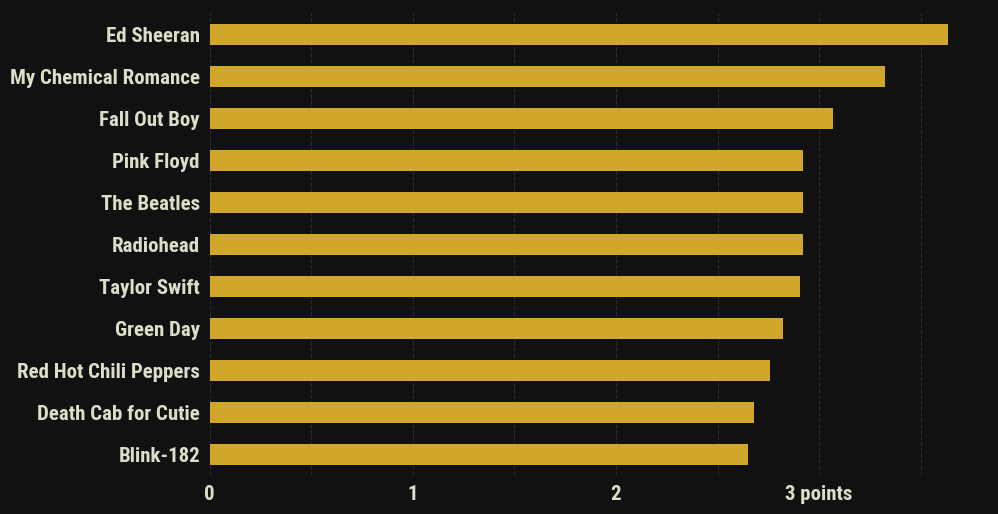

In [13]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df.groupby('artist_name').rating.mean().sort_values().plot(kind='barh', color=['#D1A72A'], figsize=(10,6))
#barlabels = ['Blink-182', 'Death Cab for Cutie', 'Red Hot Chili Peppers', 'Green Day', 'Taylor Swift', 'Radiohead', 'The Beatles', 'Pink Floyd', 'Fall Out Boy', 'My Chemical Romance', 'Ed Sheeran']
ax.grid(axis='y')
ax.set_ylabel('')
#ax.set_title('Who has the best tabs?', loc='left', pad = 40, fontdict={'color': '#DDDDC9'})
#ax.set_yticklabels(labels=barlabels, fontdict={'color': '#DDDDC9'})
ax.set_xticklabels(labels=[0, '', 1, '', 2, '', '3 points'], fontdict={'color': '#DDDDC9'})

ax.spines['left'].set_color('none')

#ax.text(0, 11, 'According to Ultimate Guitar\'s five point scale, Ed Sheeran > The Beatles.', fontdict={'family': 'serif', 'color': '#DDDDC9'})

#plt.savefig("whos-tabs-are-best-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

In [14]:
squarecolors = ['#D1A72A', '#2D2D2D', '#8e7e05', '#EB5852', '#CCC614', '#993D3D']
squarecolors = squarecolors[::-1]
squarecolors

['#993D3D', '#CCC614', '#EB5852', '#8e7e05', '#2D2D2D', '#D1A72A']

[]

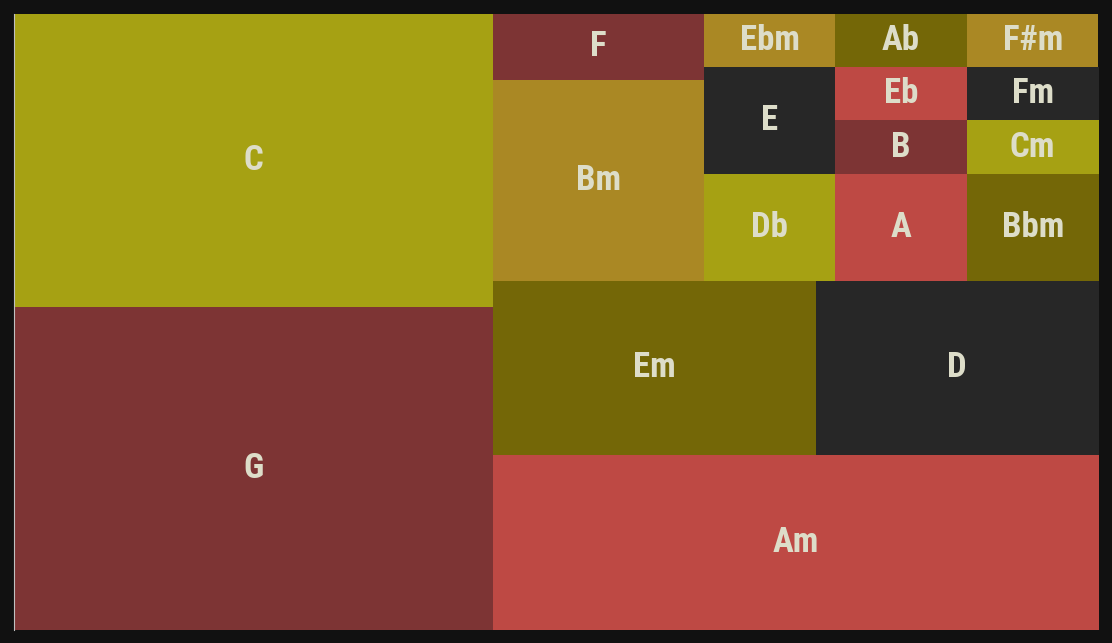

In [15]:
#df_top.tonality_name.value_counts().plot(kind='barh')

plt.rc('font', size=25)

fig, ax = plt.subplots(facecolor='#111111')

fig.set_size_inches(14,8)

ax = squarify.plot(sizes=df_top.tonality_name.value_counts(), label=df_top.tonality_name.value_counts().index, alpha=.8, color=squarecolors)
#plt.axis('off')
#plt.show()

ax.grid(False)
ax.set_xticklabels(labels='')
ax.set_yticklabels(labels='')


#ax.set_title('Popular keys of popular tabs', loc='left', pad=45, fontdict={'color': '#DDDDC9'}, size=30)
#ax.text(0,104, 'Of the 100 top rated tabs on Ultimate Guitar, the keys of C and G reign supreme.', fontdict={'color': '#DDDDC9', 'family': 'serif'}, size=20)
#plt.savefig("popular-keys-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


In [16]:
df_top.datetime = pd.to_datetime(df_top.datetime)

Text(0,0.5,'')

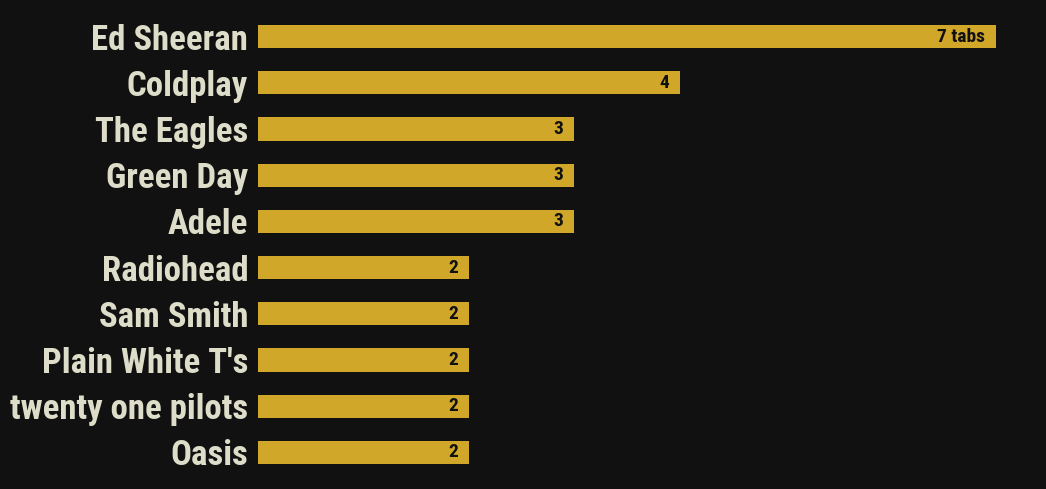

In [17]:
fig, ax = plt.subplots(facecolor='#111111')

df_top.artist_name.value_counts().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color=['#D1A72A'], figsize=(10,6))
barlabels = ['Oasis', 'twenty one pilots', 'Plain White T\'s', 'Sam Smith', 'Radiohead', 'Adele', 'Green Day', 'The Eagles', 'Coldplay', 'Ed Sheeran']

#ax.set_title('Who has the most tabs among the 100 best rated?', loc='left', fontdict={'color': '#DDDDC9'}, pad=8, size=30)
ax.set_yticklabels(labels=barlabels, fontdict={'color': '#DDDDC9'})
ax.set_xticklabels(labels=[''], fontdict={'color': '#DDDDC9'})

for i, bar in enumerate(ax.patches):

    if i == 9:
        value = str(int(round(bar.get_width()))) + " tabs"
        x_pos = bar.get_width() - .1
        y_pos = i
    else:
        value = str(int(round(bar.get_width())))
        x_pos = bar.get_width() - .1
        y_pos = i
    ax.text(x_pos, y_pos, value, ha='right', va='center', fontdict={'color': '#111111', 'size': 14}, fontweight='bold')

#ax.text(0, 9.8, 'According to Ultimate Guitar\'s five point scale, Ed Sheeran > The Beatles.', fontdict={'family': 'serif', 'color': '#DDDDC9'})

ax.spines['left'].set_visible(False)

ax.grid(False)
ax.set_ylabel('')
#plt.savefig("how-many-tabs-top-100-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')



In [18]:
beatles = df_sans_2018[df_sans_2018.artist_name == 'The Beatles']

In [19]:
beatles.song_name.value_counts().head(5).sort_values()

Something    42
Blackbird    44
Hey Jude     45
Let It Be    50
Yesterday    52
Name: song_name, dtype: int64

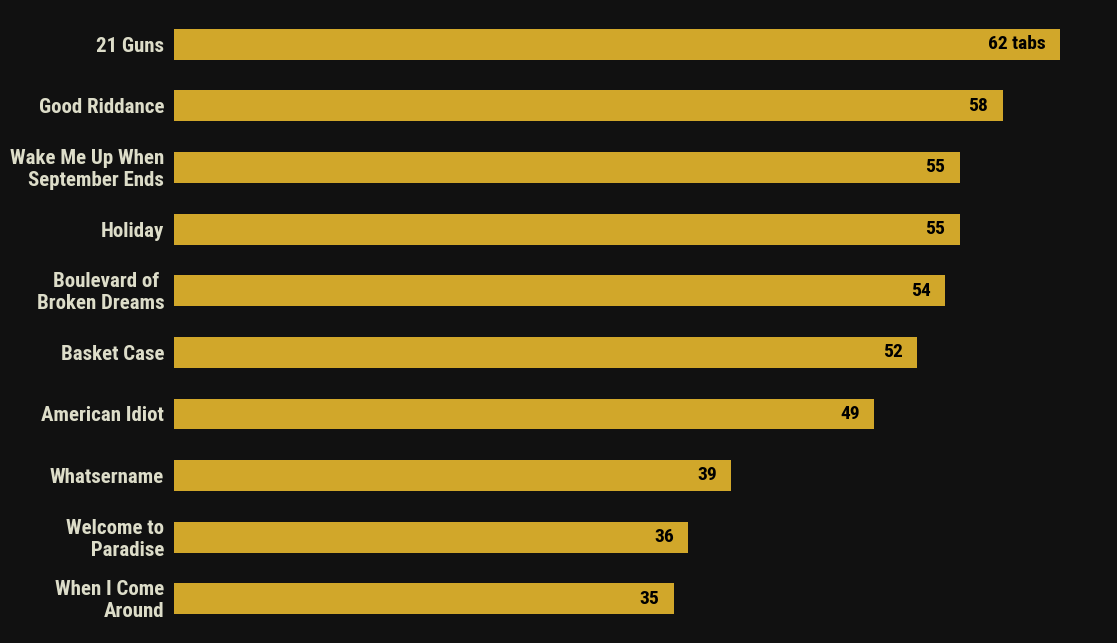

In [188]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df[df.artist_name == 'Green Day'].song_name.value_counts().head(10).sort_values().plot(kind='barh', color=['#D1A72A'], figsize=(12,8))

barlabels = ['When I Come\nAround', 'Welcome to\n Paradise', 'Whatsername', 'American Idiot', 'Basket Case', 'Boulevard of \nBroken Dreams', 'Holiday', 'Wake Me Up When\nSeptember Ends', 'Good Riddance', '21 Guns']

ax.set_yticklabels(labels=barlabels, color='#DDDDC9')
ax.set_xticklabels(labels = '')

for i, bar in enumerate(ax.patches):
    if i == 9:
        value = str(int(round(bar.get_width()))) + " tabs"
        x_pos = bar.get_width() - 1
        y_pos = i
    else:
        value = str(int(round(bar.get_width())))
        x_pos = bar.get_width() - 1
        y_pos = i
    ax.text(x_pos, y_pos, value, ha='right', va='center', fontdict={'color': 'black', 'size': 14}, fontweight='bold')

ax.spines['left'].set_visible(False)

#ax.set_title('Most tabbed Beatles songs', loc='left', fontdict={'color': '#DDDDC9'}, pad=8, size=30)

ax.grid(False)

plt.savefig("most-tabbed-greenday-revision-final.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

In [21]:
beatles[beatles.difficulty != '0'].difficulty.value_counts()

intermediate    1010
novice           557
advanced          38
Name: difficulty, dtype: int64

In [55]:
df['year'] = df.datetime.dt.year

In [62]:
all_tabs_over_time = df.groupby(['artist_name', 'year']).id.count().unstack()

In [63]:
all_tabs_over_time.fillna(0, inplace=True)

In [72]:
all_tabs_over_time.transpose()

artist_name,Blink-182,Death Cab for Cutie,Ed Sheeran,Fall Out Boy,Green Day,My Chemical Romance,Pink Floyd,Radiohead,Red Hot Chili Peppers,Taylor Swift,The Beatles
year,,,,,,,,,,,
2000,407.0,25.0,0.0,23.0,280.0,53.0,255.0,275.0,624.0,0.0,223.0
2001,211.0,0.0,0.0,0.0,219.0,0.0,48.0,86.0,144.0,0.0,280.0
2002,202.0,0.0,0.0,0.0,108.0,0.0,17.0,17.0,92.0,0.0,15.0
2003,179.0,4.0,0.0,2.0,146.0,1.0,234.0,105.0,118.0,0.0,134.0
2004,180.0,18.0,0.0,58.0,177.0,22.0,42.0,51.0,140.0,0.0,208.0
2005,58.0,58.0,0.0,66.0,192.0,97.0,63.0,34.0,81.0,0.0,209.0
2006,84.0,81.0,0.0,149.0,150.0,217.0,101.0,81.0,399.0,27.0,246.0
2007,82.0,50.0,0.0,169.0,130.0,180.0,88.0,115.0,332.0,50.0,424.0
2008,70.0,112.0,0.0,131.0,138.0,87.0,62.0,125.0,137.0,73.0,334.0


In [110]:
cmap = cm.get_cmap('inferno', 11)    # PiYG
color_list = []
for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    color_list.append(matplotlib.colors.rgb2hex(rgb))

In [134]:
color_list = color_list[::-1]

In [114]:
ax.axes.set_position(pos='bottom', which='original')

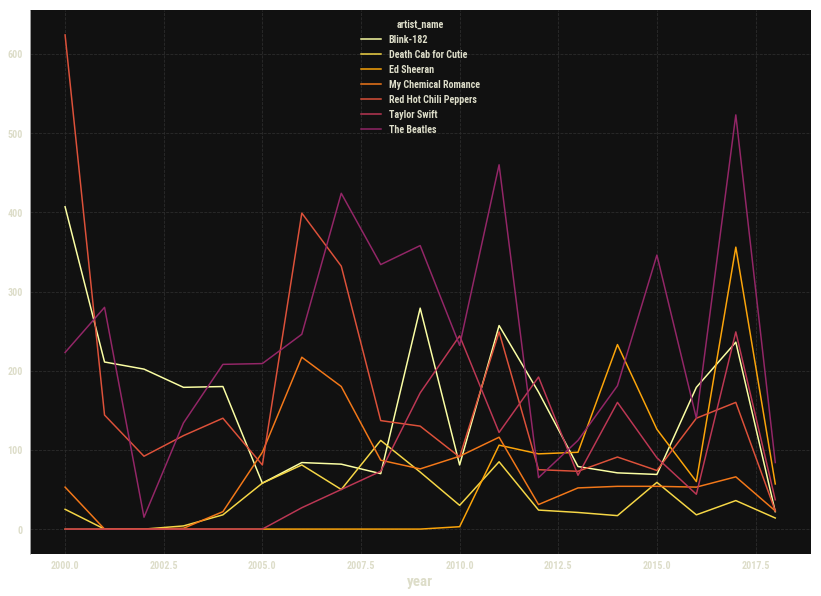

In [141]:
fig, ax = plt.subplots()

ax = all_tabs_over_time.transpose().drop(columns=['Fall Out Boy', 'Pink Floyd', 'Green Day', 'Radiohead']).plot(figsize=(14,10), color=color_list, ax=ax)


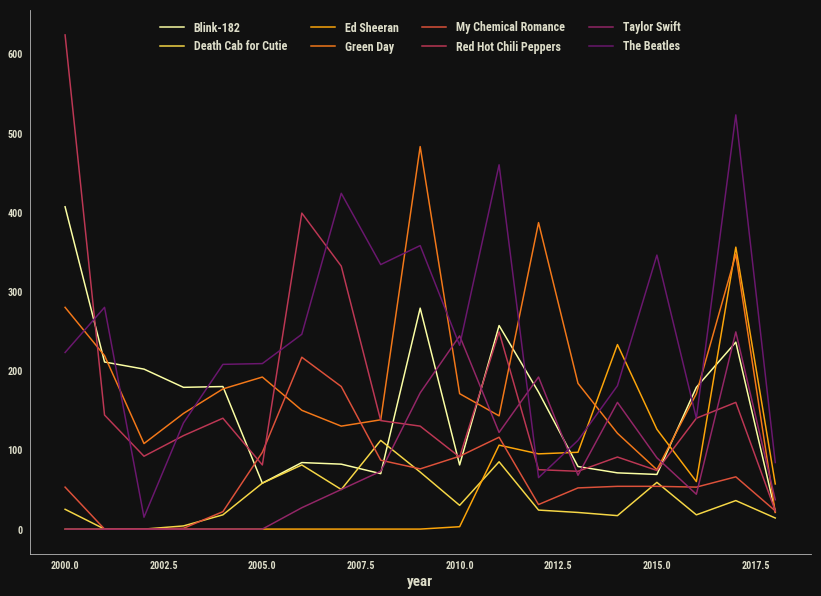

In [153]:
fig, ax = plt.subplots(facecolor='#111111', edgecolor='#111111')

ax = all_tabs_over_time.transpose().drop(columns=['Fall Out Boy', 'Pink Floyd', 'Radiohead']).plot(figsize=(14,10), color=color_list, ax=ax)

ax.spines['bottom'].set_visible(True)
ax.grid(False)


ax.legend(loc='upper center', ncol=4, fontsize=12)

In [ ]:
ax.spines['bottom'].set_position

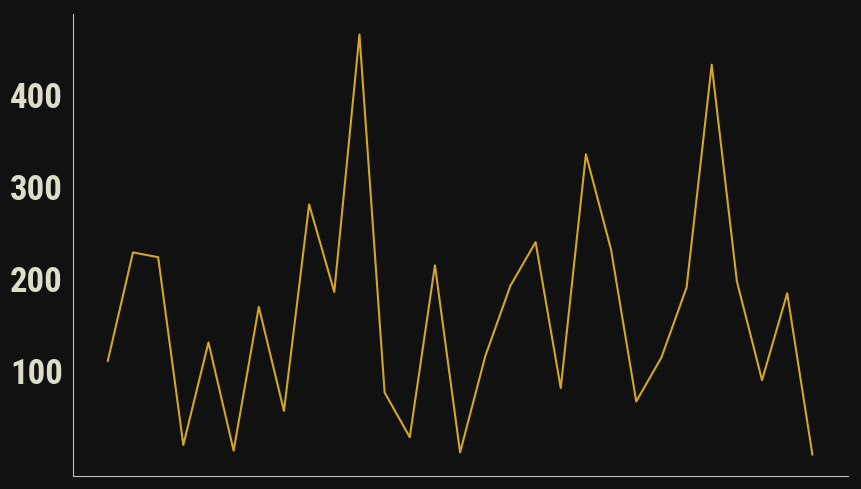

In [77]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df.groupby('artist_name').resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_title('Beatles tabs uploaded over the years', loc='left', pad=35)
#ax.text(29.15,570,'People will never stop loving on the greatest band ever.', fontdict={'family':'serif'})

#ax.set_xticklabels(labels=[2000,2005,2010,2015], color='#DDDDC9')
ax.set_yticklabels(labels=['','',100,200,300,400,500], color='#DDDDC9')
ax.spines['bottom'].set_visible(True)

#plt.savefig("beatles-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


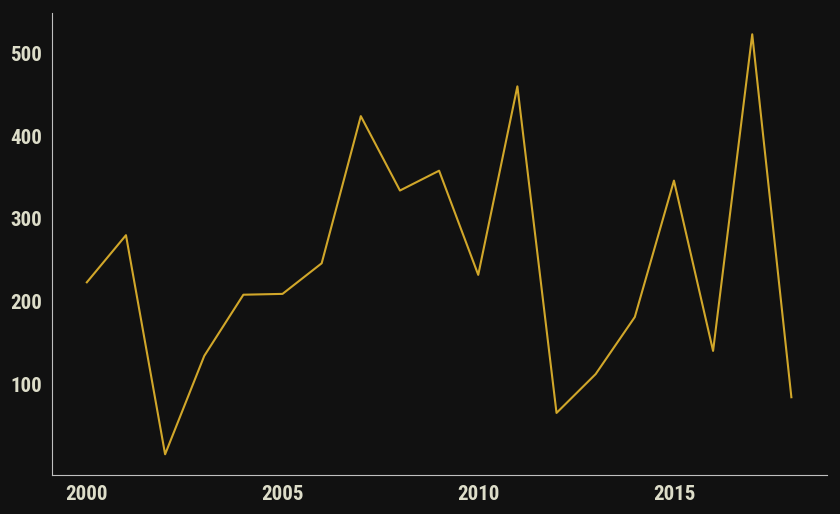

In [171]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df[df.artist_name == 'The Beatles'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_title('Beatles tabs uploaded over the years', loc='left', pad=35)
#ax.text(29.15,570,'People will never stop loving on the greatest band ever.', fontdict={'family':'serif'})

#ax.set_xticklabels(labels=[2000,2005,2010,2015], color='#DDDDC9')
ax.set_yticklabels(labels=['','',100,200,300,400,500], color='#DDDDC9')
ax.spines['bottom'].set_visible(True)

plt.savefig("beatles-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


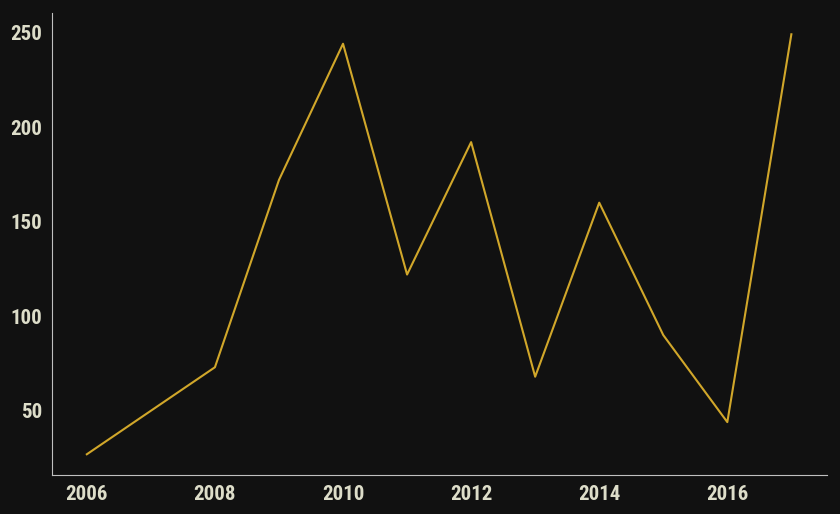

In [172]:
fig, ax = plt.subplots(facecolor='#111111')

df_sans_2018[df_sans_2018.artist_name == 'Taylor Swift'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

#ax.set_title('Taylor Swift tabs uploaded over the years', loc='left', pad=35)
#ax.text(35.5,270,'The old Taylor died and came back with a vengeance.', fontdict={'family':'serif'})

ax.set_xticklabels(labels=[2006,2008,2010,2012,2014,2016], color='#DDDDC9')
ax.set_yticklabels(labels=['',50,100,150,200,250], color='#DDDDC9')
ax.spines['bottom'].set_visible(True)

plt.savefig("tayswift-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


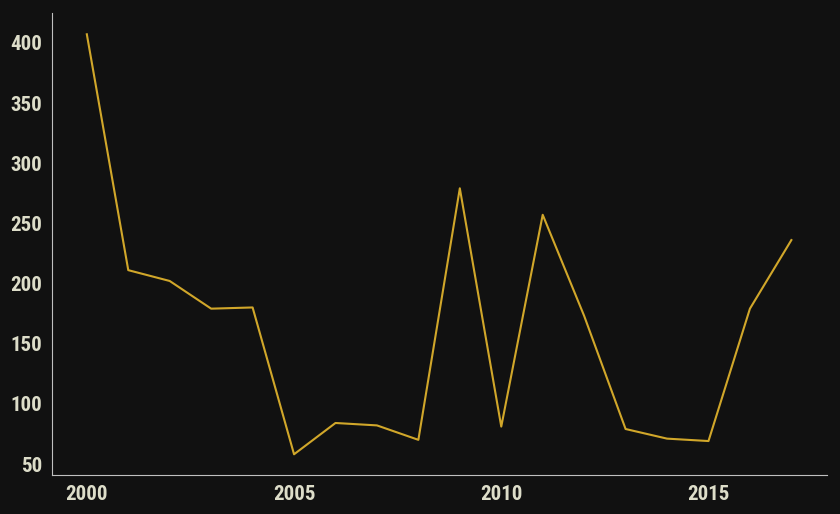

In [173]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df_sans_2018[df_sans_2018.artist_name == 'Blink-182'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

#ax.set_title('Blink-182 tabs uploaded over the years', loc='left', pad=33)
#ax.text(29.15,437,'They got the band back together... twice.', fontdict={'family':'serif'})

ax.set_xticklabels(labels=[2000,2005,2010,2015], color='#DDDDC9')
ax.set_yticklabels(labels=['','50',100,'150',200,'250',300, '350', 400], color='#DDDDC9')
ax.spines['bottom'].set_visible(True)

plt.savefig("blink-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


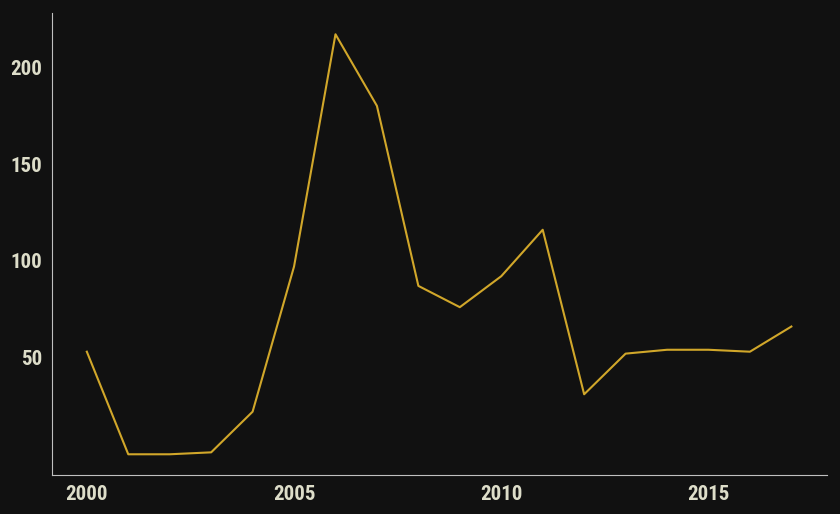

In [175]:
ax, fig = plt.subplots()

ax = df_sans_2018[df_sans_2018.artist_name == 'My Chemical Romance'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

#ax.set_title('My Chemical Romance uploads over the years', loc='left', pad=33)
#ax.text(29.17,236,'Like me, My Chemical Romance peaked in the aughts.', fontdict={'family':'serif'})

ax.set_xticklabels(labels=[2000,2005,2010,2015], color='#DDDDC9')
ax.set_yticklabels(labels=['','',50,100,150,200], color='#DDDDC9')
ax.spines['bottom'].set_visible(True)

plt.savefig("mychem-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


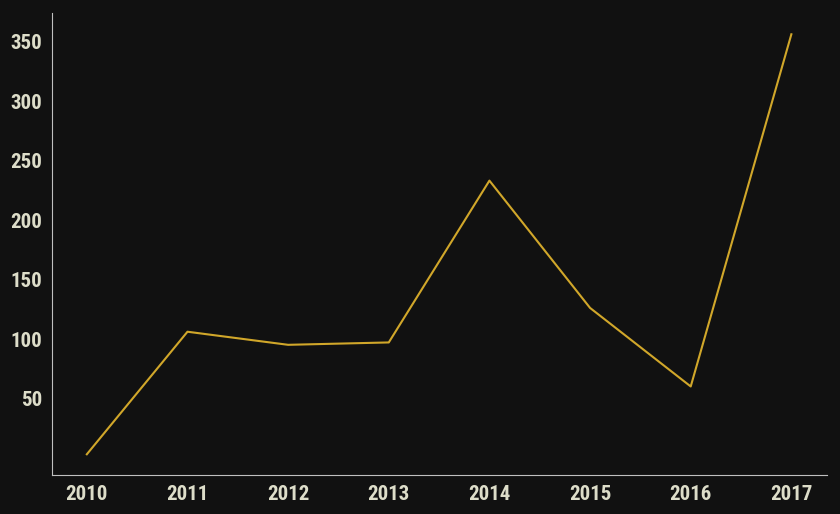

In [176]:
fig, ax = plt.subplots()

ax = df_sans_2018[df_sans_2018.artist_name == 'Ed Sheeran'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

#ax.set_title('Ed Sheeran tabs uploaded over the years', loc='left', pad=33)
#ax.text(39.66,388,'Sheeran is probably in love with the shape of this line.', fontdict={'family':'serif'})

ax.set_xticklabels(labels=[2010,2010,2011,2012,2013, 2014, 2015, 2016, 2017], color='#DDDDC9')
ax.set_yticklabels(labels=['','',50,100,150,200, 250, 300, 350], color='#DDDDC9')
ax.spines['bottom'].set_visible(True)

plt.savefig("sheeran-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


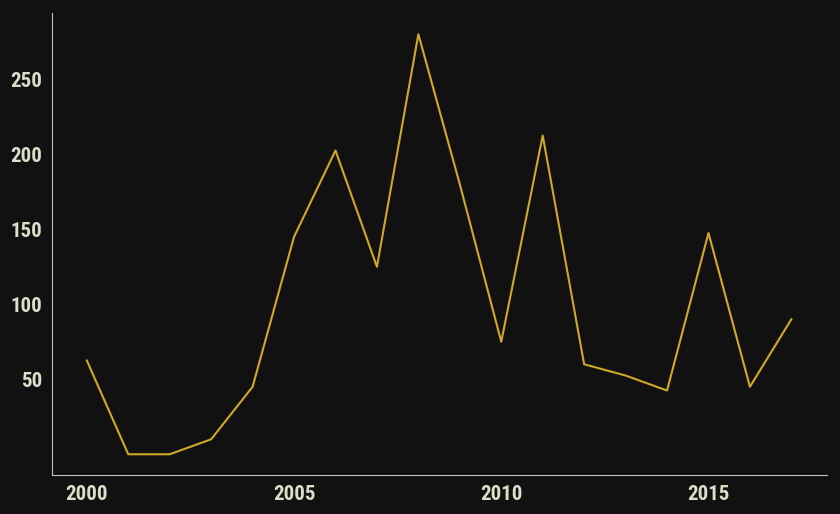

In [179]:
fig, ax = plt.subplots()

ax = df_sans_2018[df_sans_2018.artist_name == 'Death Cab for Cutie'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

#ax.set_title('Death Cab for Cutie tabs uploaded over the years', loc='left', pad=33)


#ax.set_xticklabels(labels=[2010,2010,2011,2012,2013, 2014, 2015, 2016, 2017], color='#DDDDC9')
ax.set_yticklabels(labels=['','',50,100,150,200, 250, 300, 350], color='#DDDDC9')
ax.spines['bottom'].set_visible(True)

plt.savefig("deathcab-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


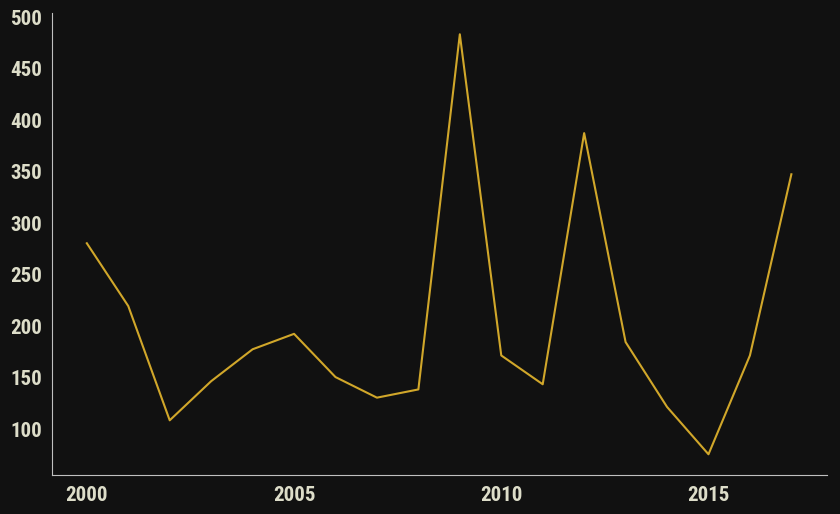

In [181]:
fig, ax = plt.subplots()

df_sans_2018[df_sans_2018.artist_name == 'Green Day'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

ax.spines['bottom'].set_visible(True)

plt.savefig("greenday-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


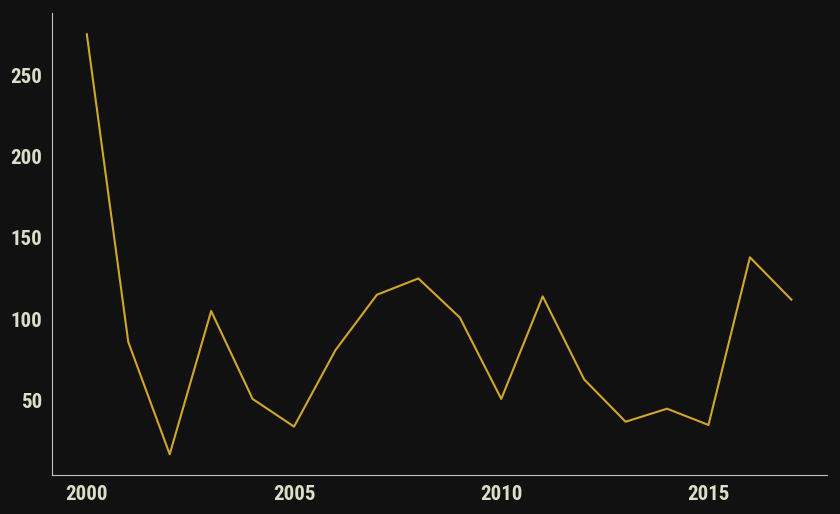

In [182]:
fig, ax = plt.subplots()

df_sans_2018[df_sans_2018.artist_name == 'Radiohead'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

ax.spines['bottom'].set_visible(True)

plt.savefig("radiohead-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


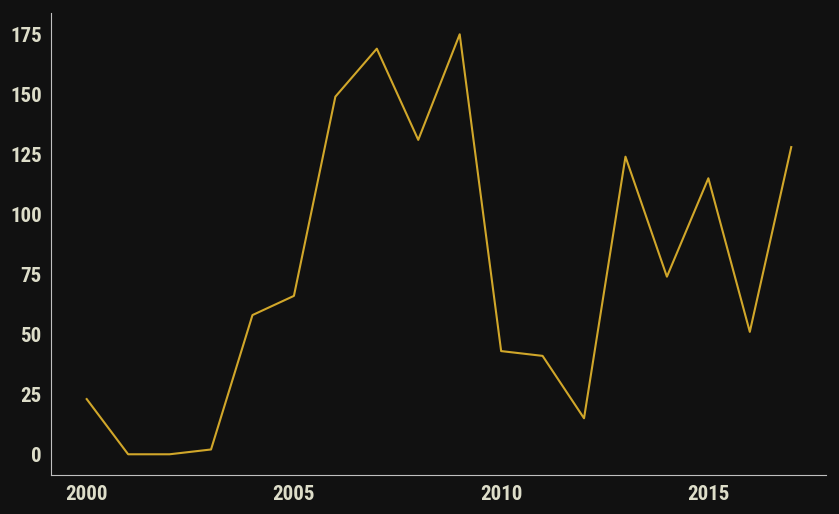

In [186]:
fig, ax = plt.subplots()

df_sans_2018[df_sans_2018.artist_name == 'Fall Out Boy'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

ax.spines['bottom'].set_visible(True)

plt.savefig("falloutboy-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


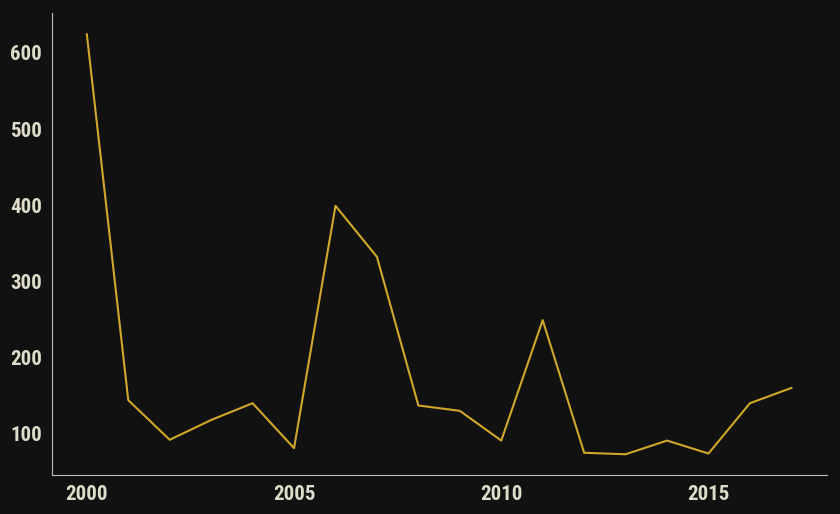

In [187]:
fig, ax = plt.subplots()

df_sans_2018[df_sans_2018.artist_name == 'Red Hot Chili Peppers'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

ax.spines['bottom'].set_visible(True)

plt.savefig("chilipeppers-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


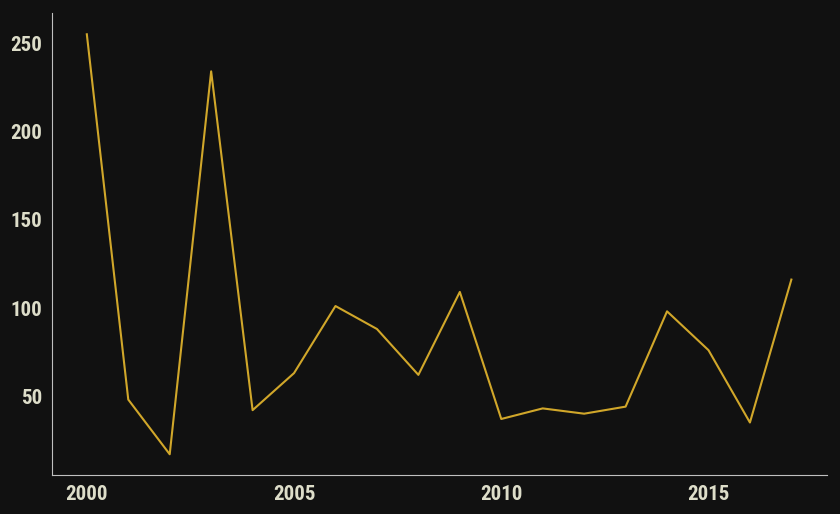

In [188]:
fig, ax = plt.subplots()

df_sans_2018[df_sans_2018.artist_name == 'Pink Floyd'].resample("A", on='datetime').id.count().plot(figsize=(10,6))

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')

ax.spines['bottom'].set_visible(True)

plt.savefig("pinkfloyd-tabs-timeseries-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


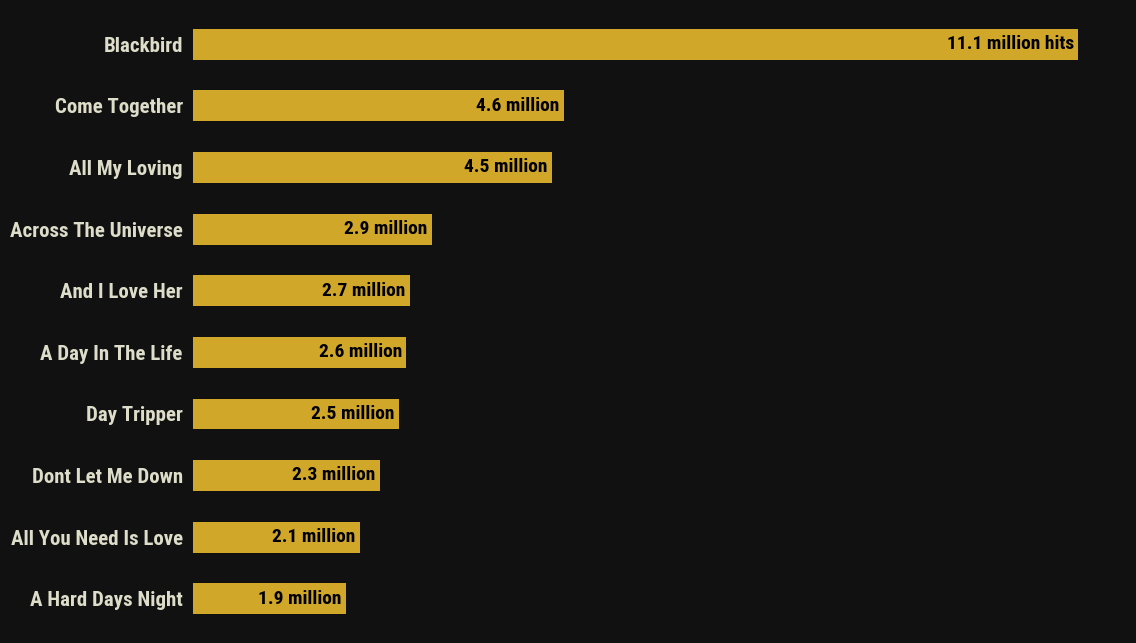

In [189]:
fig, ax = plt.subplots(facecolor='#111111')

ax = df[df.artist_name == 'The Beatles'].groupby('song_name').hits.sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', figsize=(12,8), color='#D1A72A')

ax.set_ylabel('')
ax.set_xlabel('')

for i, bar in enumerate(ax.patches):
    if i == 9:
        value = str(int(round(bar.get_width())))
        x_pos = bar.get_width() - 1
        y_pos = i
    else:
        value = str(int(round(bar.get_width())))
        x_pos = bar.get_width() - 1
        y_pos = i
    digit_number = len(value)
    if digit_number == 8:
        value = '11.1 million hits '
    if digit_number == 7:
        value = str(value[0]) + '.' + str(value[1]) + ' million '
    ax.text(x_pos, y_pos, value, ha='right', va='center', fontdict={'color': 'black', 'size': 14}, fontweight='bold')

ax.grid(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels('')

#ax.set_title('Most viewed Beatles songs', loc='left', pad=10)

plt.savefig("most-viewed-beatles-revision-3.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


In [185]:
df.artist_name.value_counts()

The Beatles              4574
Green Day                3643
Red Hot Chili Peppers    3173
Blink-182                2919
Radiohead                1609
Pink Floyd               1545
Taylor Swift             1528
Fall Out Boy             1406
My Chemical Romance      1274
Ed Sheeran               1133
Death Cab for Cutie       724
Name: artist_name, dtype: int64

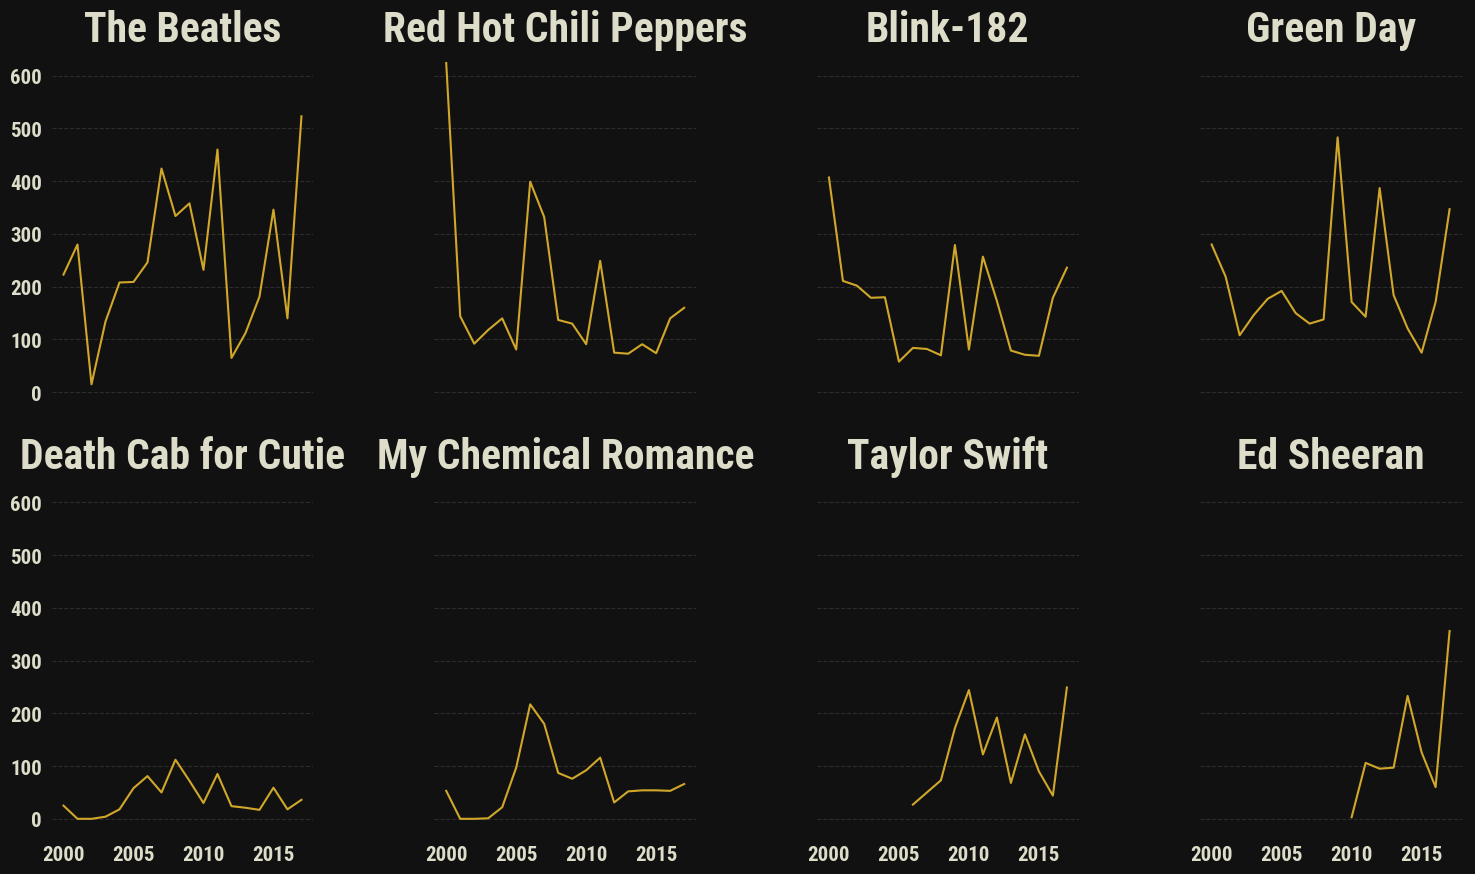

In [181]:
# Beacuse I'm asking for two rows of three columns each,
# I need to separate them out with even MORE parentheses
# Using figsize to make the figure a little bigger, 10"x5"
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(15,9), facecolor='#111111')

# Doing each of these manually (ugh)
df_sans_2018[df_sans_2018.artist_name == 'The Beatles'].resample("A", on='datetime').id.count().plot(legend=False, ax=ax1)
ax1.set_title("The Beatles")
df_sans_2018[df_sans_2018.artist_name == 'Red Hot Chili Peppers'].resample("A", on='datetime').id.count().plot(legend=False, ax=ax2)
ax2.set_title("Red Hot Chili Peppers")
df_sans_2018[df_sans_2018.artist_name == 'Blink-182'].resample("A", on='datetime').id.count().plot(legend=False, ax=ax3)
ax3.set_title("Blink-182")
df_sans_2018[df_sans_2018.artist_name == 'Taylor Swift'].resample("A", on='datetime').id.count().plot(legend=False, ax=ax7)
ax7.set_title("Taylor Swift")
df_sans_2018[df_sans_2018.artist_name == 'My Chemical Romance'].resample("A", on='datetime').id.count().plot(legend=False, ax=ax6)
ax6.set_title("My Chemical Romance")
df_sans_2018[df_sans_2018.artist_name == 'Ed Sheeran'].resample("A", on='datetime').id.count().plot(legend=False, ax=ax8)
ax8.set_title("Ed Sheeran")
df_sans_2018[df_sans_2018.artist_name == 'Death Cab for Cutie'].resample("A", on='datetime').id.count().plot(legend=False, ax=ax5)
ax5.set_title("Death Cab for Cutie")
df_sans_2018[df_sans_2018.artist_name == 'Green Day'].resample("A", on='datetime').id.count().plot(legend=False, ax=ax4)
ax4.set_title("Green Day")

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.grid(axis='x')
    ax.spines['left'].set_visible(False)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.tick_params(labelsize=15)
    

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()
plt.savefig("small-multiples.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')



In [142]:
df.artist_name.value_counts()

The Beatles              4574
Green Day                3643
Red Hot Chili Peppers    3173
Blink-182                2919
Radiohead                1609
Pink Floyd               1545
Taylor Swift             1528
Fall Out Boy             1406
My Chemical Romance      1274
Ed Sheeran               1133
Death Cab for Cutie       724
Name: artist_name, dtype: int64